In [1]:
import pandas as pd  # Para manejar datos
import matplotlib.pyplot as plt  # Para graficar
import seaborn as sns  # Para gráficas más bonitas
from sklearn.preprocessing import StandardScaler  # Para escalar datos
from sklearn.decomposition import PCA  # PCA para reducción de dimensionalidad

In [2]:
df = pd.read_csv("D:/DocumentsD/ecbd/2daevaluacion/data/comprar_alquilar.csv")  # Leemos el dataset

X = df.drop("comprar", axis=1) # Separamos variables numéricas (excluimos la columna 'comprar' que es la etiqueta)

In [3]:
scaler = StandardScaler() # PCA funciona mejor cuando los datos están escalados
X_scaled = scaler.fit_transform(X)

In [4]:
pca = PCA(n_components=2) # Elegimos 2 componentes para poder graficar
X_pca = pca.fit_transform(X_scaled)

In [5]:
# Elegimos 2 componentes principales para visualizar los datos en 2D
print("Varianza explicada por cada componente:", pca.explained_variance_ratio_)
print("Varianza total explicada por 2 componentes:", sum(pca.explained_variance_ratio_))

Varianza explicada por cada componente: [0.29913557 0.23294923]
Varianza total explicada por 2 componentes: 0.5320847979308863


In [6]:
# Convertimos a DataFrame para graficar fácilmente
df_pca = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
df_pca["comprar"] = df["comprar"]  # Agregamos la columna de etiqueta

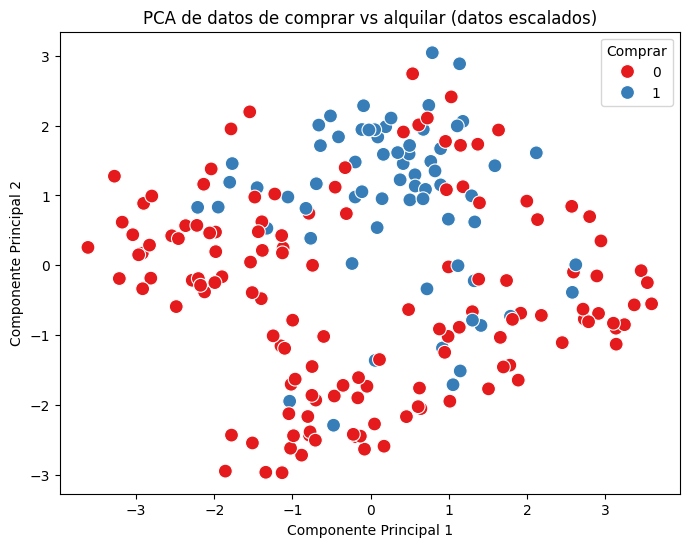

In [7]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_pca, x="PC1", y="PC2", hue="comprar", palette="Set1", s=100)
plt.title("PCA de datos de comprar vs alquilar (datos escalados)")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.legend(title="Comprar")
plt.show()

In [8]:
# Reducción sin escalamiento para la comparación
pca_no_scale = PCA(n_components=2)
X_pca_no_scale = pca_no_scale.fit_transform(X) # Usamos datos sin escalar

df_pca_no_scale = pd.DataFrame(X_pca_no_scale, columns=["PC1", "PC2"])
df_pca_no_scale["comprar"] = df["comprar"]

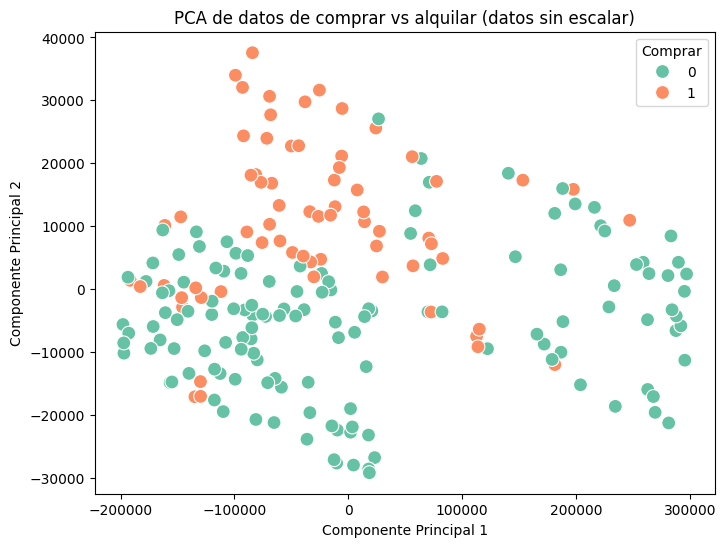

In [9]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_pca_no_scale, x="PC1", y="PC2", hue="comprar", palette="Set2", s=100)
plt.title("PCA de datos de comprar vs alquilar (datos sin escalar)")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.legend(title="Comprar")
plt.show()